##
## House Prices: Advanced Regression Techniques

In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [447]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [448]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [449]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Full Data, and Data Cleaning

In [450]:
full = train.merge(test, how='outer')

In [451]:
full.Alley.fillna('NoAlley', inplace=True)

In [452]:
full.LotFrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<ipython-input-453-6b46680801fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full.LotFrontage.dropna())


<Axes: xlabel='LotFrontage', ylabel='Density'>

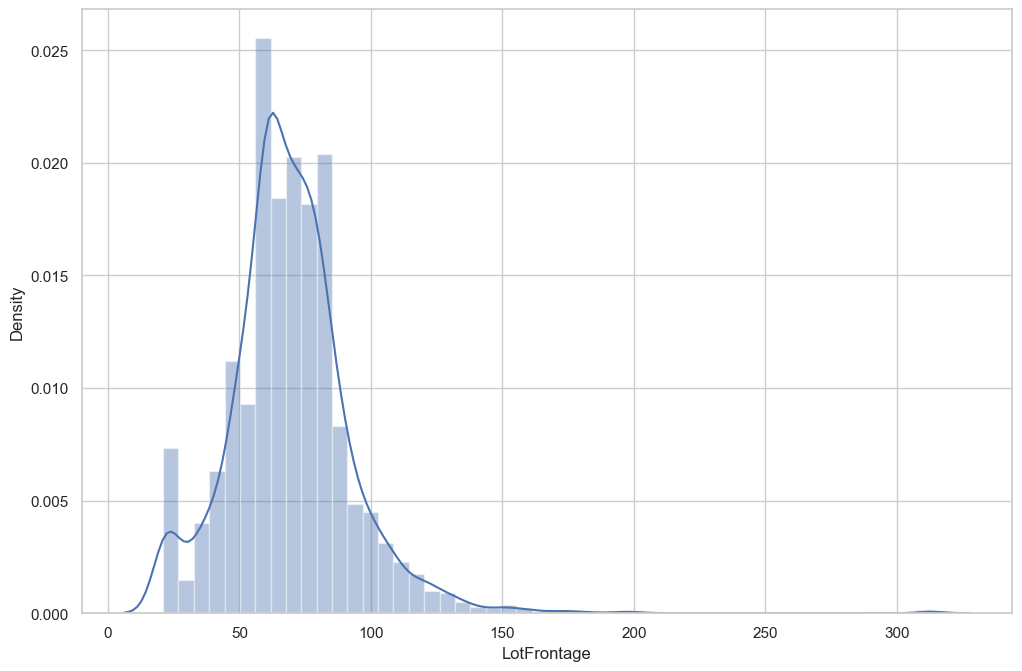

In [453]:
plt.figure(figsize=(12, 8), dpi=100)
sns.distplot(full.LotFrontage.dropna())

In [454]:
full.LotFrontage.fillna(full.LotFrontage.median(), inplace=True)

In [455]:
full.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [456]:
full.Utilities.fillna('AllPub', inplace=True)

<BarContainer object of 15 artists>

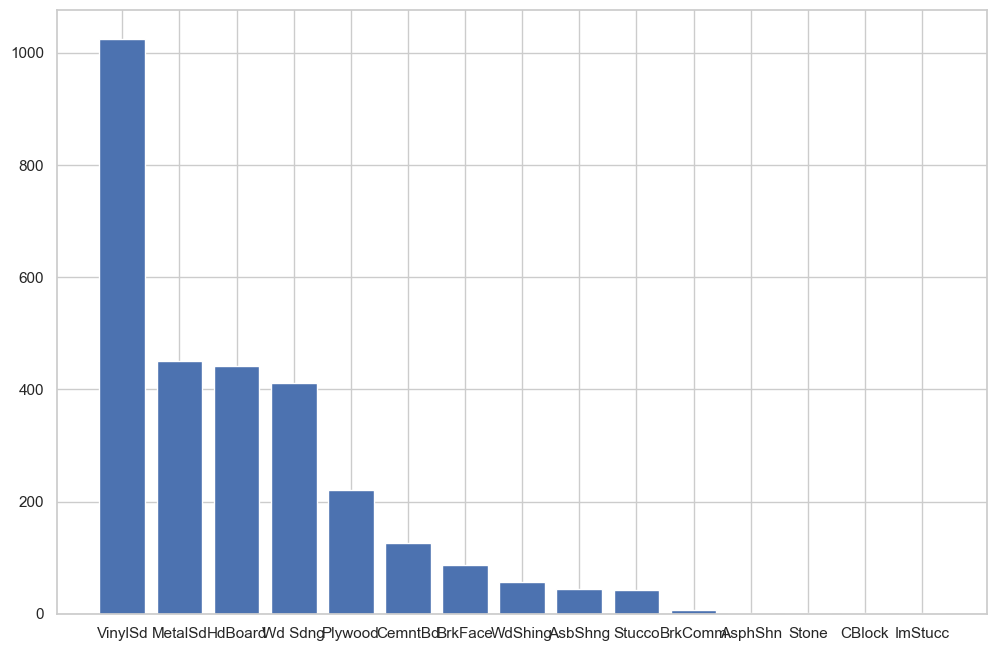

In [457]:
plt.figure(figsize=(12, 8), dpi=100)
plt.bar(full.Exterior1st.value_counts().index, full.Exterior1st.value_counts())

In [458]:
full.Exterior1st.value_counts()
full.Exterior1st.fillna('VinylSd', inplace=True)

In [459]:
full.MSZoning.value_counts()
full.MSZoning.fillna('RL', inplace=True)

In [460]:
full.Exterior2nd.value_counts()
full.Exterior2nd.fillna('VinylSd', inplace=True)

In [461]:
full.MasVnrType.fillna('None', inplace=True)

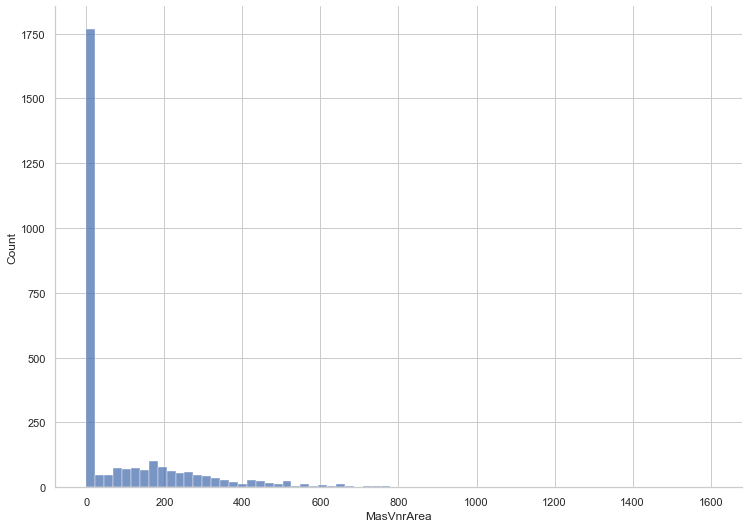

In [462]:
sns.displot(full.MasVnrArea.dropna()).fig.set_size_inches(12, 8)

In [463]:
full.MasVnrArea.fillna(0, inplace=True)

In [464]:
full.BsmtQual.fillna('NoBsmt', inplace=True)
full.BsmtCond.fillna('NoBsmt', inplace=True)
full.BsmtExposure.fillna('NoBsmt', inplace=True)
full.BsmtFinType1.fillna('NoBsmt', inplace=True)
full.BsmtFinType2.fillna('NoBsmt', inplace=True)

In [465]:
full.BsmtFinSF1.fillna(0, inplace=True)
full.BsmtFinSF2.fillna(0, inplace=True)
full.BsmtUnfSF.fillna(0, inplace=True)
full.TotalBsmtSF.fillna(0, inplace=True)

In [466]:
full.Electrical.fillna('SBrkr', inplace=True)
full.BsmtFullBath.fillna(0, inplace=True)
full.BsmtHalfBath.fillna(0, inplace=True)

In [467]:
full.KitchenQual.fillna('TA', inplace=True)
full.Functional.fillna('Typ', inplace=True)

In [468]:
full.FireplaceQu.fillna('NoFireplace', inplace=True)
full.GarageType.fillna('NoGarage', inplace=True)
full.GarageYrBlt.fillna(0, inplace=True)
full.GarageFinish.fillna('NoGarage', inplace=True)
full.GarageQual.fillna('NoGarage', inplace=True)
full.GarageCond.fillna('NoGarage', inplace=True)
full.GarageCars.fillna(0, inplace=True)
full.GarageArea.fillna(0, inplace=True)
full.PoolQC.fillna('NoPool', inplace=True)
full.Fence.fillna('NoFence', inplace=True)
full.MiscFeature.fillna('None', inplace=True)
full.SaleType.fillna('WD', inplace=True)

In [469]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [470]:
from sklearn.preprocessing import LabelEncoder

In [471]:
# LabelEncoder
LE = LabelEncoder()


def label_encoder(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            LE.fit(data[col])
            data[col] = LE.transform(data[col])
    return data

In [472]:
full = label_encoder(full)

In [473]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          2919 non-null   int64  
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   int64  
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   int64  
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [474]:
full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000.0


In [475]:
train = full[full.SalePrice.notnull()]
test = full[full.SalePrice.isnull()]

#### Data Visualization

In [476]:
corr = train.corr()

<Axes: >

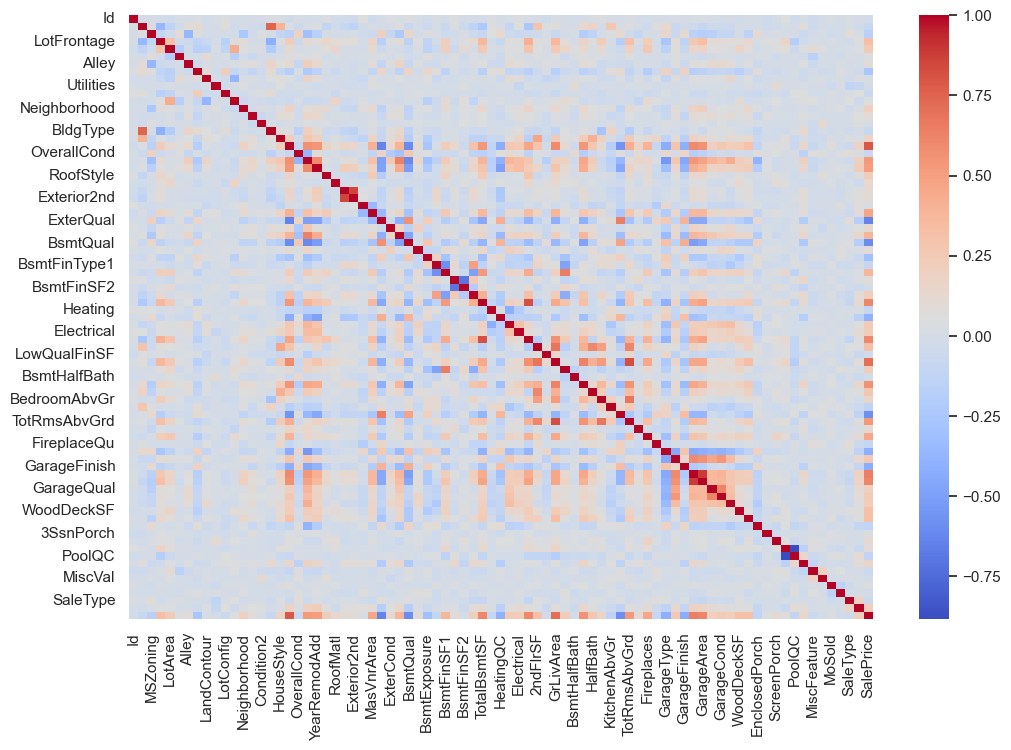

In [477]:
plt.figure(figsize=(12, 8), dpi=100)
sns.heatmap(corr, cmap='coolwarm')

#### Random Forest Model

In [478]:
from sklearn.ensemble import RandomForestRegressor

In [479]:
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train.SalePrice

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [481]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [482]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [483]:
rf.score(X_test, y_test)

0.8696976078590146

In [484]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
GarageType     -0.415283
GarageFinish   -0.425684
KitchenQual    -0.589189
BsmtQual       -0.593734
ExterQual      -0.636884
Name: SalePrice, Length: 81, dtype: float64

In [485]:
corr_value = corr['SalePrice'].sort_values(ascending=False).where(lambda x: abs(x) > 0.1).dropna().index.to_list()

In [486]:
train = train[corr_value]

In [487]:
train

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,KitchenAbvGr,MSZoning,LotShape,BsmtExposure,HeatingQC,GarageType,GarageFinish,KitchenQual,BsmtQual,ExterQual
0,208500.0,7,1710,2.0,548.0,856.0,856,2,8,2003,...,1,3,3,3,0,1,2,2,2,2
1,181500.0,6,1262,2.0,460.0,1262.0,1262,2,6,1976,...,1,3,3,1,0,1,2,3,2,3
2,223500.0,7,1786,2.0,608.0,920.0,920,2,6,2001,...,1,3,0,2,0,1,2,2,2,2
3,140000.0,7,1717,3.0,642.0,756.0,961,1,7,1915,...,1,3,0,3,2,5,3,2,4,3
4,250000.0,8,2198,3.0,836.0,1145.0,1145,2,9,2000,...,1,3,0,0,0,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6,1647,2.0,460.0,953.0,953,2,7,1999,...,1,3,3,3,0,1,2,3,2,3
1456,210000.0,6,2073,2.0,500.0,1542.0,2073,2,7,1978,...,1,3,3,3,4,1,3,3,2,3
1457,266500.0,7,2340,1.0,252.0,1152.0,1188,2,9,1941,...,1,3,3,3,0,1,2,2,4,0
1458,142125.0,5,1078,1.0,240.0,1078.0,1078,1,5,1950,...,1,3,3,2,2,1,3,2,4,3


In [488]:
X = train.drop(['SalePrice'], axis=1)

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [490]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [491]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [492]:
rf.score(X_test, y_test)

0.855682077739438

#### Cross Validation

In [493]:
# Cross Validation

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [494]:
scores

array([-30680.25133101, -37339.60303348, -37397.16293117, -26578.52472472,
       -23436.09331928])

In [495]:
mean_cross_val = np.mean(scores)
mean_cross_val

-31086.327067931612

In [496]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [497]:
rf.score(X_test, y_test)

0.8518054508829972

In [498]:
test = test[corr_value]

In [499]:
X_test_oo = test.drop(['SalePrice'], axis=1)

In [500]:
result = rf.predict(X_test_oo)

In [501]:
result = pd.DataFrame(result)
result.columns = ['SalePrice']

In [502]:
# combine Id and SalePrice
Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [503]:
result.to_csv('result_rf.csv', index=False)

In [504]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


#### XGBoost Model

In [505]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)

In [506]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [507]:
xgb.score(X_train, y_train)

0.9999865667804918

In [508]:
xgb.score(X_test, y_test)

0.8942892793101531

In [509]:
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [510]:
scores

array([-26162.24292097, -31578.01357559, -41384.81042819, -23764.71186973,
       -21558.80456255])

In [511]:
mean_cross_val = np.mean(scores)

In [512]:
mean_cross_val

-28889.71667140402

In [513]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [514]:
xgb.score(X_train, y_train)

0.9999865667804918

In [515]:
xgb.predict(X_test_oo)

array([119775.586, 153519.31 , 185671.34 , ..., 159726.77 , 110015.71 ,
       218248.94 ], dtype=float32)

In [516]:
result = xgb.predict(X_test_oo)
result = pd.DataFrame(result)
result.columns = ['SalePrice']

In [517]:
# combine Id and SalePrice

Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [518]:
result.to_csv('result_xgb.csv', index=False)

In [519]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


In [520]:
# LGBoost

In [521]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=1000, learning_rate=0.05)

In [522]:
lgb.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=1000)

In [523]:
lgb.score(X_train, y_train)

0.9978838575156924

In [524]:
lgb.score(X_test, y_test)

0.874129036930103

In [525]:
scores = cross_val_score(lgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [526]:
scores

array([-26459.91668557, -35251.8761178 , -43568.15410705, -28496.97287381,
       -23342.99359881])

In [527]:
mean_cross_val = np.mean(scores)

In [528]:
mean_cross_val

-31423.982676605974

In [529]:
lgb.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, n_estimators=1000)

In [530]:
lgb.score(X_train, y_train)

0.9978838575156924

In [531]:
lgb.predict(X_test_oo)

array([125445.96325458, 153047.61785588, 185350.96455187, ...,
       148466.77344005, 112797.20688657, 225465.37626244])

In [532]:
result = lgb.predict(X_test_oo)

In [533]:
result = pd.DataFrame(result)
result.columns = ['SalePrice']

In [534]:
# combine Id and SalePrice

Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [535]:
result.to_csv('result_lgb.csv', index=False)

In [536]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


### Tensorflow

In [537]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [538]:
### Model

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [539]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
37/37 [==============================] - 0s 2ms/step - loss: 34445312000.0000 - val_loss: 22604128256.0000
Epoch 2/1000
37/37 [==============================] - 0s 803us/step - loss: 19403810816.0000 - val_loss: 5735739392.0000
Epoch 3/1000
37/37 [==============================] - 0s 846us/step - loss: 9512801280.0000 - val_loss: 4228957184.0000
Epoch 4/1000
37/37 [==============================] - 0s 828us/step - loss: 6816253440.0000 - val_loss: 3621298176.0000
Epoch 5/1000
37/37 [==============================] - 0s 900us/step - loss: 5231036928.0000 - val_loss: 3269435904.0000
Epoch 6/1000
37/37 [==============================] - 0s 907us/step - loss: 4327788032.0000 - val_loss: 3053219328.0000
Epoch 7/1000
37/37 [==============================] - 0s 844us/step - loss: 3678193920.0000 - val_loss: 3005985792.0000
Epoch 8/1000
37/37 [==============================] - 0s 844us/step - loss: 3544455424.0000 - val_loss: 2784025088.0000
Epoch 9/1000
37/37 [===================

In [540]:
losses = pd.DataFrame(model.history.history)

<Axes: >

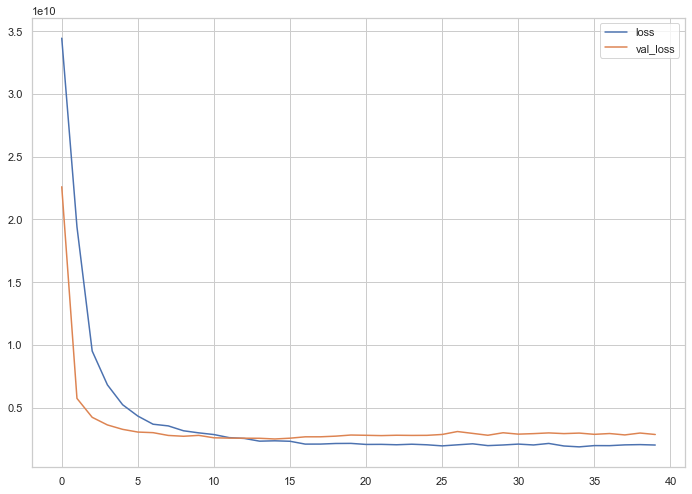

In [541]:
losses.plot()

In [542]:
model.evaluate(X_test, y_test, verbose=0)

2859910400.0

In [543]:
test = test[corr_value]

In [544]:
test

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,KitchenAbvGr,MSZoning,LotShape,BsmtExposure,HeatingQC,GarageType,GarageFinish,KitchenQual,BsmtQual,ExterQual
1460,NaN,5,896,1.0,730.0,882.0,896,1,5,1961,...,1,2,3,3,4,1,3,3,4,3
1461,NaN,6,1329,1.0,312.0,1329.0,1329,1,6,1958,...,1,3,0,3,4,1,3,2,4,3
1462,NaN,5,1629,2.0,482.0,928.0,928,2,6,1997,...,1,3,0,3,2,1,0,3,2,3
1463,NaN,6,1604,2.0,470.0,926.0,926,2,7,1998,...,1,3,0,3,0,1,0,2,4,3
1464,NaN,8,1280,2.0,506.0,1280.0,1280,2,5,1992,...,1,3,0,3,0,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,NaN,4,1092,0.0,0.0,546.0,546,1,5,1970,...,1,4,3,3,2,6,1,3,4,3
2915,NaN,4,1092,1.0,286.0,546.0,546,1,6,1970,...,1,4,3,3,4,4,3,3,4,3
2916,NaN,5,1224,2.0,576.0,1224.0,1224,1,7,1960,...,1,3,3,3,0,5,3,3,4,3
2917,NaN,5,970,0.0,0.0,912.0,970,1,6,1992,...,1,3,3,0,4,6,1,3,2,3


In [545]:
X_test_oo = test.drop(['SalePrice'], axis=1)

In [546]:
result = model.predict(X_test_oo)

46/46 [==============================] - 0s 352us/step


In [547]:
result = pd.DataFrame(result)

In [548]:
result.columns = ['SalePrice']

In [549]:
# combine Id and SalePrice

Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [550]:
result.to_csv('result_tf.csv', index=False)

In [551]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


### optimize the XGBoost model

In [563]:
train_corr = train.corr()['SalePrice'].sort_values(ascending=False)

In [564]:
# drop the columns which have low correlation with SalePrice

train_corr = train_corr.where(lambda x: abs(x) > 0.2).dropna().index.to_list()

In [565]:
train_corr

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'Foundation',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'GarageYrBlt',
 'CentralAir',
 'GarageCond',
 'Electrical',
 'PavedDrive',
 'BsmtFullBath',
 'RoofStyle',
 'BsmtUnfSF',
 'SaleCondition',
 'Neighborhood',
 'GarageQual',
 'LotShape',
 'BsmtExposure',
 'HeatingQC',
 'GarageType',
 'GarageFinish',
 'KitchenQual',
 'BsmtQual',
 'ExterQual']

In [566]:
train = train[train_corr]

<Axes: >

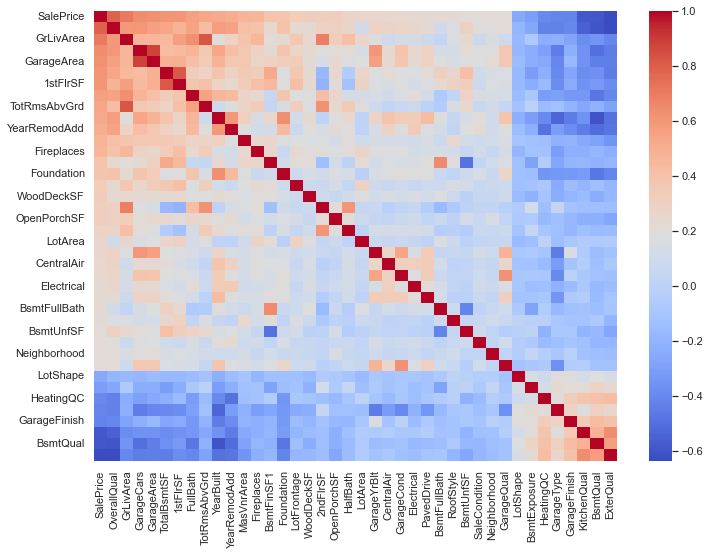

In [567]:
sns.heatmap(train.corr(), cmap='coolwarm')

In [568]:
X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [570]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [571]:
xgb.score(X_train, y_train)

0.9999771688147018

In [572]:
xgb.score(X_test, y_test)

0.8429484826465392

In [573]:
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [576]:
mean_cross_val = np.mean(scores)
mean_cross_val

-27843.115008552508

In [577]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [578]:
xgb.score(X_train, y_train)

0.9999771688147018

In [581]:
test = test[train_corr]
test

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Neighborhood,GarageQual,LotShape,BsmtExposure,HeatingQC,GarageType,GarageFinish,KitchenQual,BsmtQual,ExterQual
1460,NaN,5,896,1.0,730.0,882.0,896,1,5,1961,...,12,5,3,3,4,1,3,3,4,3
1461,NaN,6,1329,1.0,312.0,1329.0,1329,1,6,1958,...,12,5,0,3,4,1,3,2,4,3
1462,NaN,5,1629,2.0,482.0,928.0,928,2,6,1997,...,8,5,0,3,2,1,0,3,2,3
1463,NaN,6,1604,2.0,470.0,926.0,926,2,7,1998,...,8,5,0,3,0,1,0,2,4,3
1464,NaN,8,1280,2.0,506.0,1280.0,1280,2,5,1992,...,22,5,0,3,0,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,NaN,4,1092,0.0,0.0,546.0,546,1,5,1970,...,10,3,3,3,2,6,1,3,4,3
2915,NaN,4,1092,1.0,286.0,546.0,546,1,6,1970,...,10,5,3,3,4,4,3,3,4,3
2916,NaN,5,1224,2.0,576.0,1224.0,1224,1,7,1960,...,11,5,3,3,0,5,3,3,4,3
2917,NaN,5,970,0.0,0.0,912.0,970,1,6,1992,...,11,3,3,0,4,6,1,3,2,3


In [582]:
X_test_oo = test.drop(['SalePrice'], axis=1)

In [583]:
result = xgb.predict(X_test_oo)

In [585]:
result = pd.DataFrame(result)
result.columns = ['SalePrice']

In [586]:
# combine Id and SalePrice

Id = pd.read_csv('test.csv').Id
result = pd.concat([Id, result], axis=1)

In [587]:
result.to_csv('result_xgb_opt.csv', index=False)

In [588]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB
